In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Gantilah 'nama_file.csv' dengan nama file dataset Anda
df = pd.read_csv('Crime_Data.csv')

In [11]:
# Menampilkan semua kolom
print(df)

            DR_NO               Date Rptd                DATE OCC  TIME OCC   
0        10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230  \
1       190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330   
2       200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200   
3       191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730   
4       191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415   
...           ...                     ...                     ...       ...   
802951  231604807  01/27/2023 12:00:00 AM  01/26/2023 12:00:00 AM      1800   
802952  231606525  03/22/2023 12:00:00 AM  03/22/2023 12:00:00 AM      1000   
802953  231210064  04/12/2023 12:00:00 AM  04/12/2023 12:00:00 AM      1630   
802954  230115220  07/02/2023 12:00:00 AM  07/01/2023 12:00:00 AM         1   
802955  230906458  03/05/2023 12:00:00 AM  03/05/2023 12:00:00 AM       900   

        AREA    AREA NAME  Rpt Dist No  Part 1-2  C

C:\Users\User\AppData\Local\Temp\ipykernel_3872\822127791.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


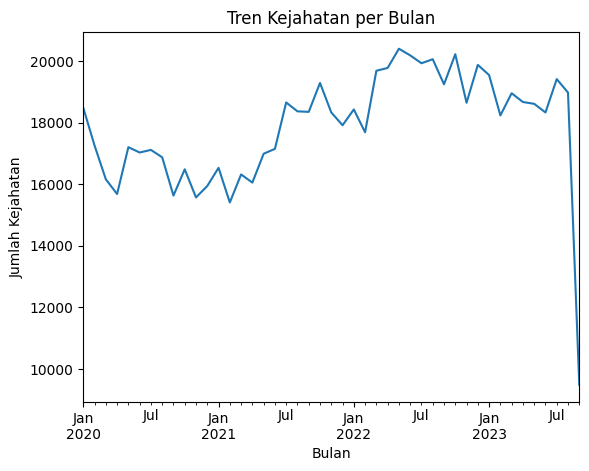

In [12]:
# Mengonversi kolom tanggal ke format datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Mengatur tanggal sebagai indeks
df.set_index('DATE OCC', inplace=True)

# Plot jumlah kejahatan per bulan
df.resample('M').size().plot()
plt.title('Tren Kejahatan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kejahatan')
plt.show()

DATE OCC
2020-01-31    18478
2020-02-29    17252
2020-03-31    16155
2020-04-30    15676
2020-05-31    17199
Freq: M, dtype: int64


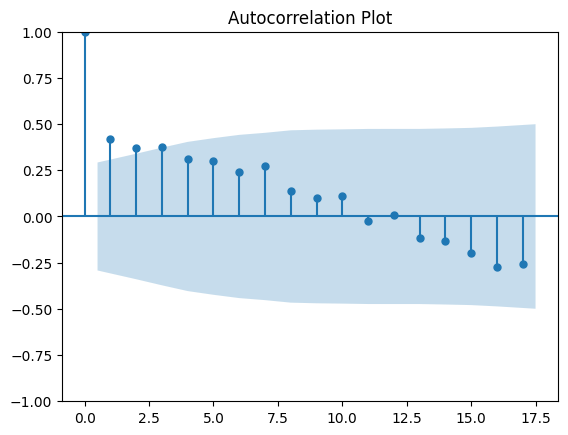

In [25]:
crime_per_day = df.resample('M').size()

# Print beberapa baris pertama dari data jumlah kejahatan per hari
print(crime_per_day.head())

# Plot fungsi autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(crime_per_day)
plt.title('Autocorrelation Plot')
plt.savefig('Autocorrelation_plot.png')
plt.show()

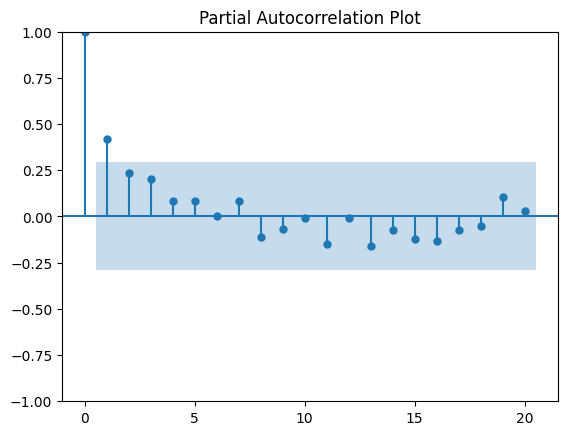

In [26]:
# Import library yang diperlukan
from statsmodels.graphics.tsaplots import plot_pacf

# Plot Partial Autocorrelation Function (PACF)
plot_pacf(crime_per_day, lags=20)  # 'lags' menunjukkan jumlah lag yang akan diplot
plt.title('Partial Autocorrelation Plot')
plt.savefig('Partial_plot.png')
plt.show()

In [63]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
# Choose the order based on ACF and PACF plot
order = (2, 0, 1)

# Create ARIMA model
model = ARIMA(crime_per_day, order=order)
results = model.fit()

# Print model summary
print(results.summary())

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   45
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -395.503
Date:                Sun, 10 Dec 2023   AIC                            801.007
Time:                        17:38:19   BIC                            810.040
Sample:                    01-31-2020   HQIC                           804.374
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.782e+04   1553.389     11.472      0.000    1.48e+04    2.09e+04
ar.L1         -0.1766      0.479     -0.368      0.713      -1.116       0.763
ar.L2          0.5745      0.345      1.668      0.0

In [69]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assume df is your DataFrame with datetime index
crime_per_day = df.resample('M').size()

# ARIMA Model
order = (2, 0, 1)
model = ARIMA(crime_per_day, order=order)
results = model.fit()

# Get predictions
preds = results.predict(start=1, end=len(df)-1, dynamic=False)

# Plot observed and predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, preds, label='Predicted', color='red')
plt.plot(df.index, crime_per_day, label='Observed', color='blue')
plt.legend()
plt.title('Observed vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()



OutOfBoundsDatetime: Cannot generate range with start=1577836800000000000 and periods=802956

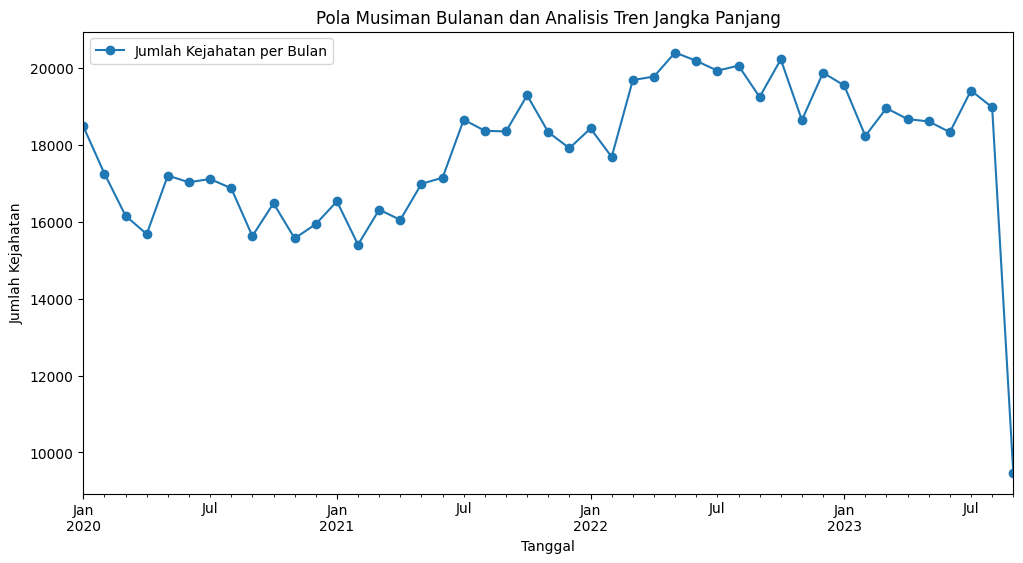

In [16]:
crime_per_month = df.resample('M').size()

# Plot jumlah kejahatan per bulan
plt.figure(figsize=(12, 6))
crime_per_month.plot(label='Jumlah Kejahatan per Bulan', marker='o')
plt.title('Pola Musiman Bulanan dan Analisis Tren Jangka Panjang')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kejahatan')
plt.legend()
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


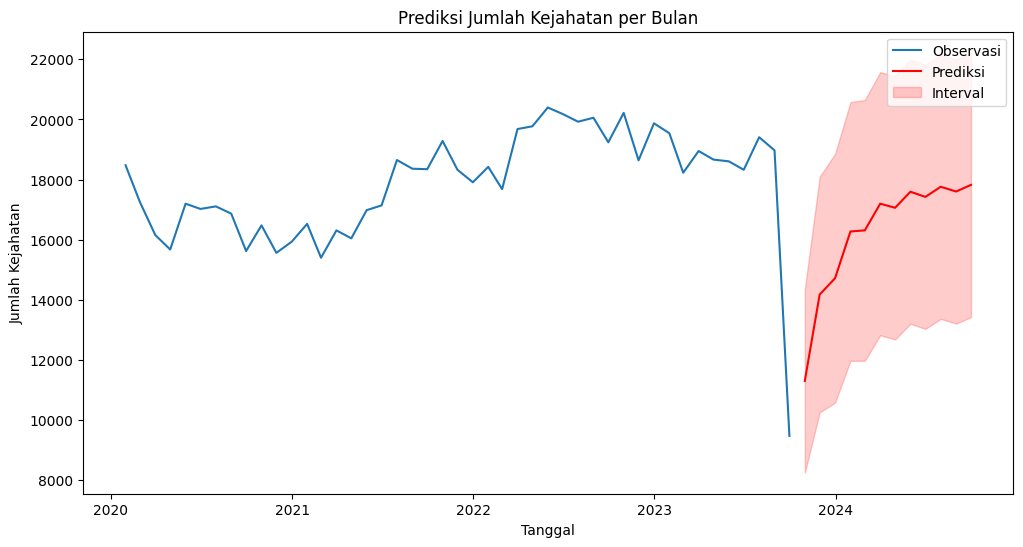

In [50]:
crime_per_month = df.resample('M').size()

# Membuat model ARIMA
model = ARIMA(crime_per_month, order=(2, 0, 1))
results = model.fit()

# Membuat prediksi untuk 12 bulan ke depan
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)

# Menampilkan hasil prediksi dan interval kepercayaan
forecast_index = pd.date_range(crime_per_month.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot hasil observasi, prediksi, dan interval kepercayaan
plt.figure(figsize=(12, 6))
plt.plot(crime_per_month.index, crime_per_month, label='Observasi')
plt.plot(forecast_index, forecast_mean, color='red', label='Prediksi')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.2, label='Interval')
plt.title('Prediksi Jumlah Kejahatan per Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kejahatan')
plt.legend()
plt.show()

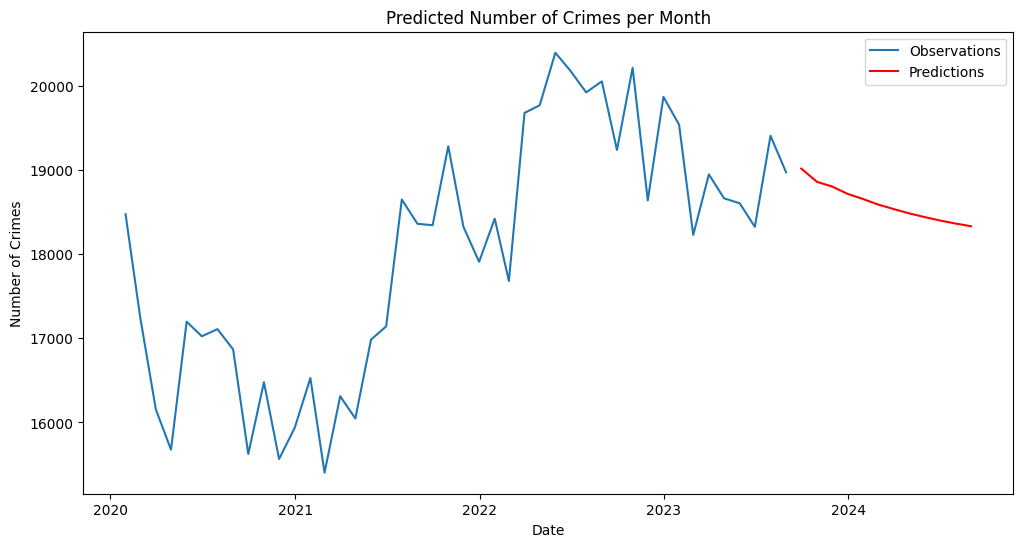

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming df is your DataFrame with a datetime index
crime_per_month = df[(df.index >= '2020-01-01') & (df.index <= '2023-08-31')].resample('M').size()

# Create ARIMA model
model = ARIMA(crime_per_month, order=(2, 0, 1))
results = model.fit()

# Make predictions for the next 12 months
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)

# Create forecast index and extract predicted mean
forecast_index = pd.date_range(crime_per_month.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_mean = forecast.predicted_mean

# Plot observations and predictions without confidence interval
plt.figure(figsize=(12, 6))
plt.plot(crime_per_month, label='Observations')
plt.plot(forecast_index, forecast_mean, color='red', label='Predictions')
plt.title('Predicted Number of Crimes per Month')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.savefig('Predicted Number of Crimes per Month.png')
plt.show()


In [18]:
df[['LOCATION', 'LAT', 'LON']] = df[['LOCATION', 'LAT', 'LON']].fillna('Unknown')

# Membuang baris dengan nilai-nilai yang hilang atau tidak valid
df.dropna(subset=['LAT', 'LON'], inplace=True)

# Menampilkan beberapa baris pertama dari DataFrame setelah membersihkan
print(df.head())

                DR_NO               Date Rptd  TIME OCC  AREA    AREA NAME   
DATE OCC                                                                     
2020-01-08   10304468  01/08/2020 12:00:00 AM      2230     3    Southwest  \
2020-01-01  190101086  01/02/2020 12:00:00 AM       330     1      Central   
2020-02-13  200110444  04/14/2020 12:00:00 AM      1200     1      Central   
2020-01-01  191501505  01/01/2020 12:00:00 AM      1730    15  N Hollywood   
2020-01-01  191921269  01/01/2020 12:00:00 AM       415    19      Mission   

            Rpt Dist No  Part 1-2  Crm Cd   
DATE OCC                                    
2020-01-08          377         2     624  \
2020-01-01          163         2     624   
2020-02-13          155         2     845   
2020-01-01         1543         2     745   
2020-01-01         1998         2     740   

                                                  Crm Cd Desc         Mocodes   
DATE OCC                                                

In [19]:
# Membersihkan data
df[['LAT', 'LON']] = df[['LAT', 'LON']].fillna(0)

# Menampilkan jumlah kejahatan di setiap area name
crime_counts_per_area_name = df['AREA NAME'].value_counts().reset_index()
crime_counts_per_area_name.columns = ['Area Name', 'Jumlah Kejahatan']

# Menampilkan tabel
print(crime_counts_per_area_name)

      Area Name  Jumlah Kejahatan
0       Central             53901
1   77th Street             50732
2       Pacific             46915
3     Southwest             44931
4     Hollywood             42658
5     Southeast             40971
6       Olympic             40623
7        Newton             40178
8   N Hollywood             39916
9      Wilshire             38100
10      Rampart             37392
11      West LA             36855
12    Northeast             34674
13     Van Nuys             34093
14  West Valley             33642
15       Harbor             33254
16   Devonshire             32588
17      Topanga             32588
18      Mission             31972
19   Hollenbeck             30134
20     Foothill             26839


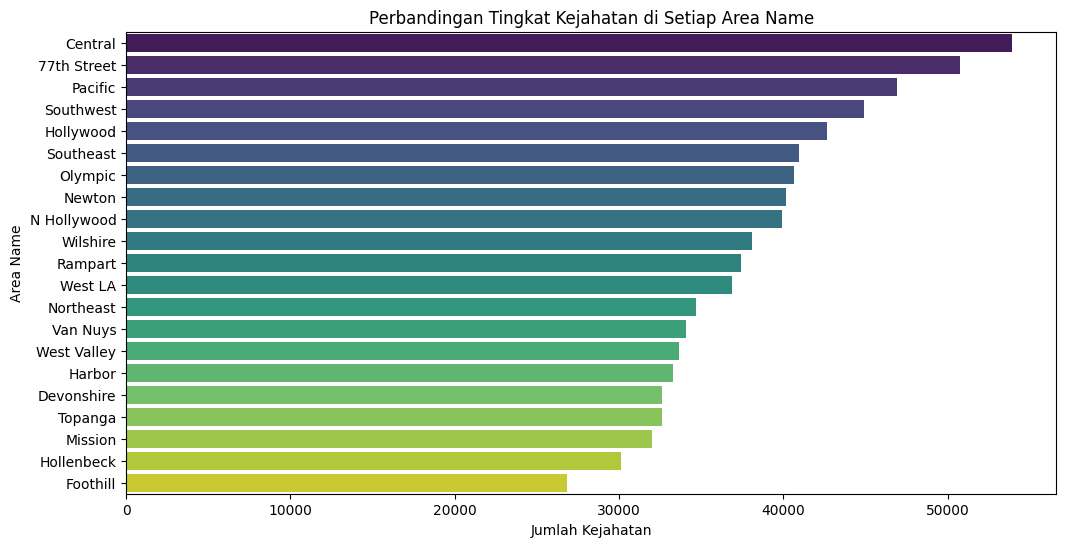

In [59]:
import seaborn as sns 

# Membersihkan data
df[['LAT', 'LON']] = df[['LAT', 'LON']].fillna(0)

# Menghitung jumlah kejahatan di setiap area name
crime_counts_per_area_name = df['AREA NAME'].value_counts().reset_index()
crime_counts_per_area_name.columns = ['Area Name', 'Jumlah Kejahatan']

# Mengurutkan berdasarkan jumlah kejahatan
crime_counts_per_area_name = crime_counts_per_area_name.sort_values(by='Jumlah Kejahatan', ascending=False)

# Visualisasi perbandingan tingkat kejahatan di setiap area name
plt.figure(figsize=(12, 6))
sns.barplot(x='Jumlah Kejahatan', y='Area Name', data=crime_counts_per_area_name, palette='viridis')
plt.title('Perbandingan Tingkat Kejahatan di Setiap Area Name')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Area Name')
plt.savefig('Perbandingan Tingkat Kejahatan di Setiap Area Name')
plt.show()

In [21]:
# Membersihkan data (jika diperlukan)
# Misalnya, mengisi nilai-nilai yang hilang di kolom tertentu atau menghapus baris dengan nilai-nilai yang hilang
df[['LAT', 'LON']] = df[['LAT', 'LON']].fillna(0)

# Menghitung jumlah setiap jenis kejahatan
crime_counts = df['Crm Cd Desc'].value_counts().reset_index()
crime_counts.columns = ['Jenis Kejahatan', 'Jumlah Kejahatan']

# Menampilkan tabel
print(crime_counts)

                                       Jenis Kejahatan  Jumlah Kejahatan
0                                     VEHICLE - STOLEN             85807
1                             BATTERY - SIMPLE ASSAULT             63848
2                                    THEFT OF IDENTITY             51144
3                                BURGLARY FROM VEHICLE             49330
4    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...             49055
..                                                 ...               ...
133  FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS ...                 4
134                          GRAND THEFT / AUTO REPAIR                 4
135                                FAILURE TO DISPERSE                 3
136                 DISHONEST EMPLOYEE ATTEMPTED THEFT                 2
137                                    INCITING A RIOT                 1

[138 rows x 2 columns]


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


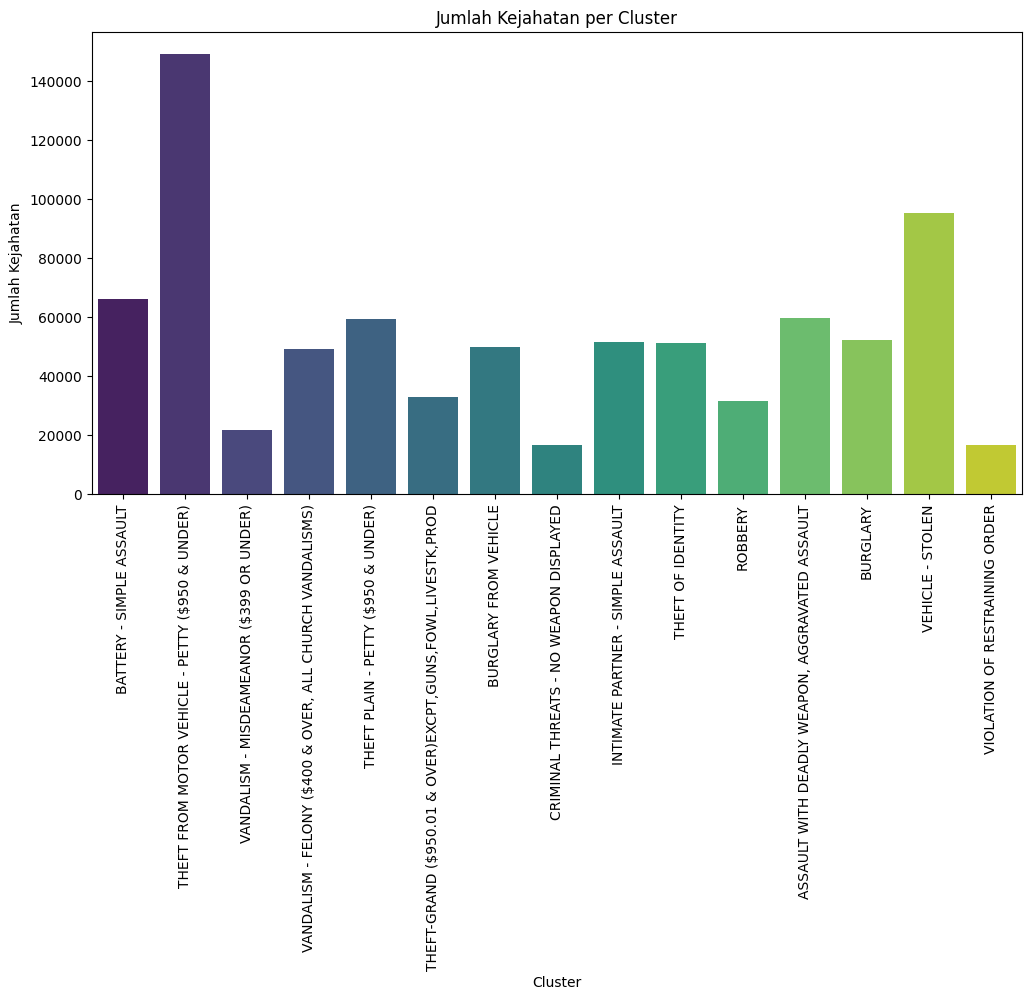

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans  # Don't forget to import KMeans
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Crm Cd Desc'])

# Melakukan clustering dengan KMeans
num_clusters = 15  # Ganti dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(tfidf_matrix)

# Menambahkan kolom cluster ke DataFrame
df['Cluster'] = kmeans.labels_

# Membuat kamus untuk memetakan cluster ke jenis kejahatan
cluster_names = df.groupby('Cluster')['Crm Cd Desc'].agg(lambda x: x.value_counts().index[0]).to_dict()

# Mengganti label cluster dengan nama jenis kejahatan
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

# Menampilkan jumlah kejahatan per cluster dalam plot bar
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster_Name', data=df, palette='viridis')
plt.title('Jumlah Kejahatan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Kejahatan')
plt.xticks(rotation=90)
plt.savefig('Jumlah Kejahatan per Cluster.png')
plt.show()

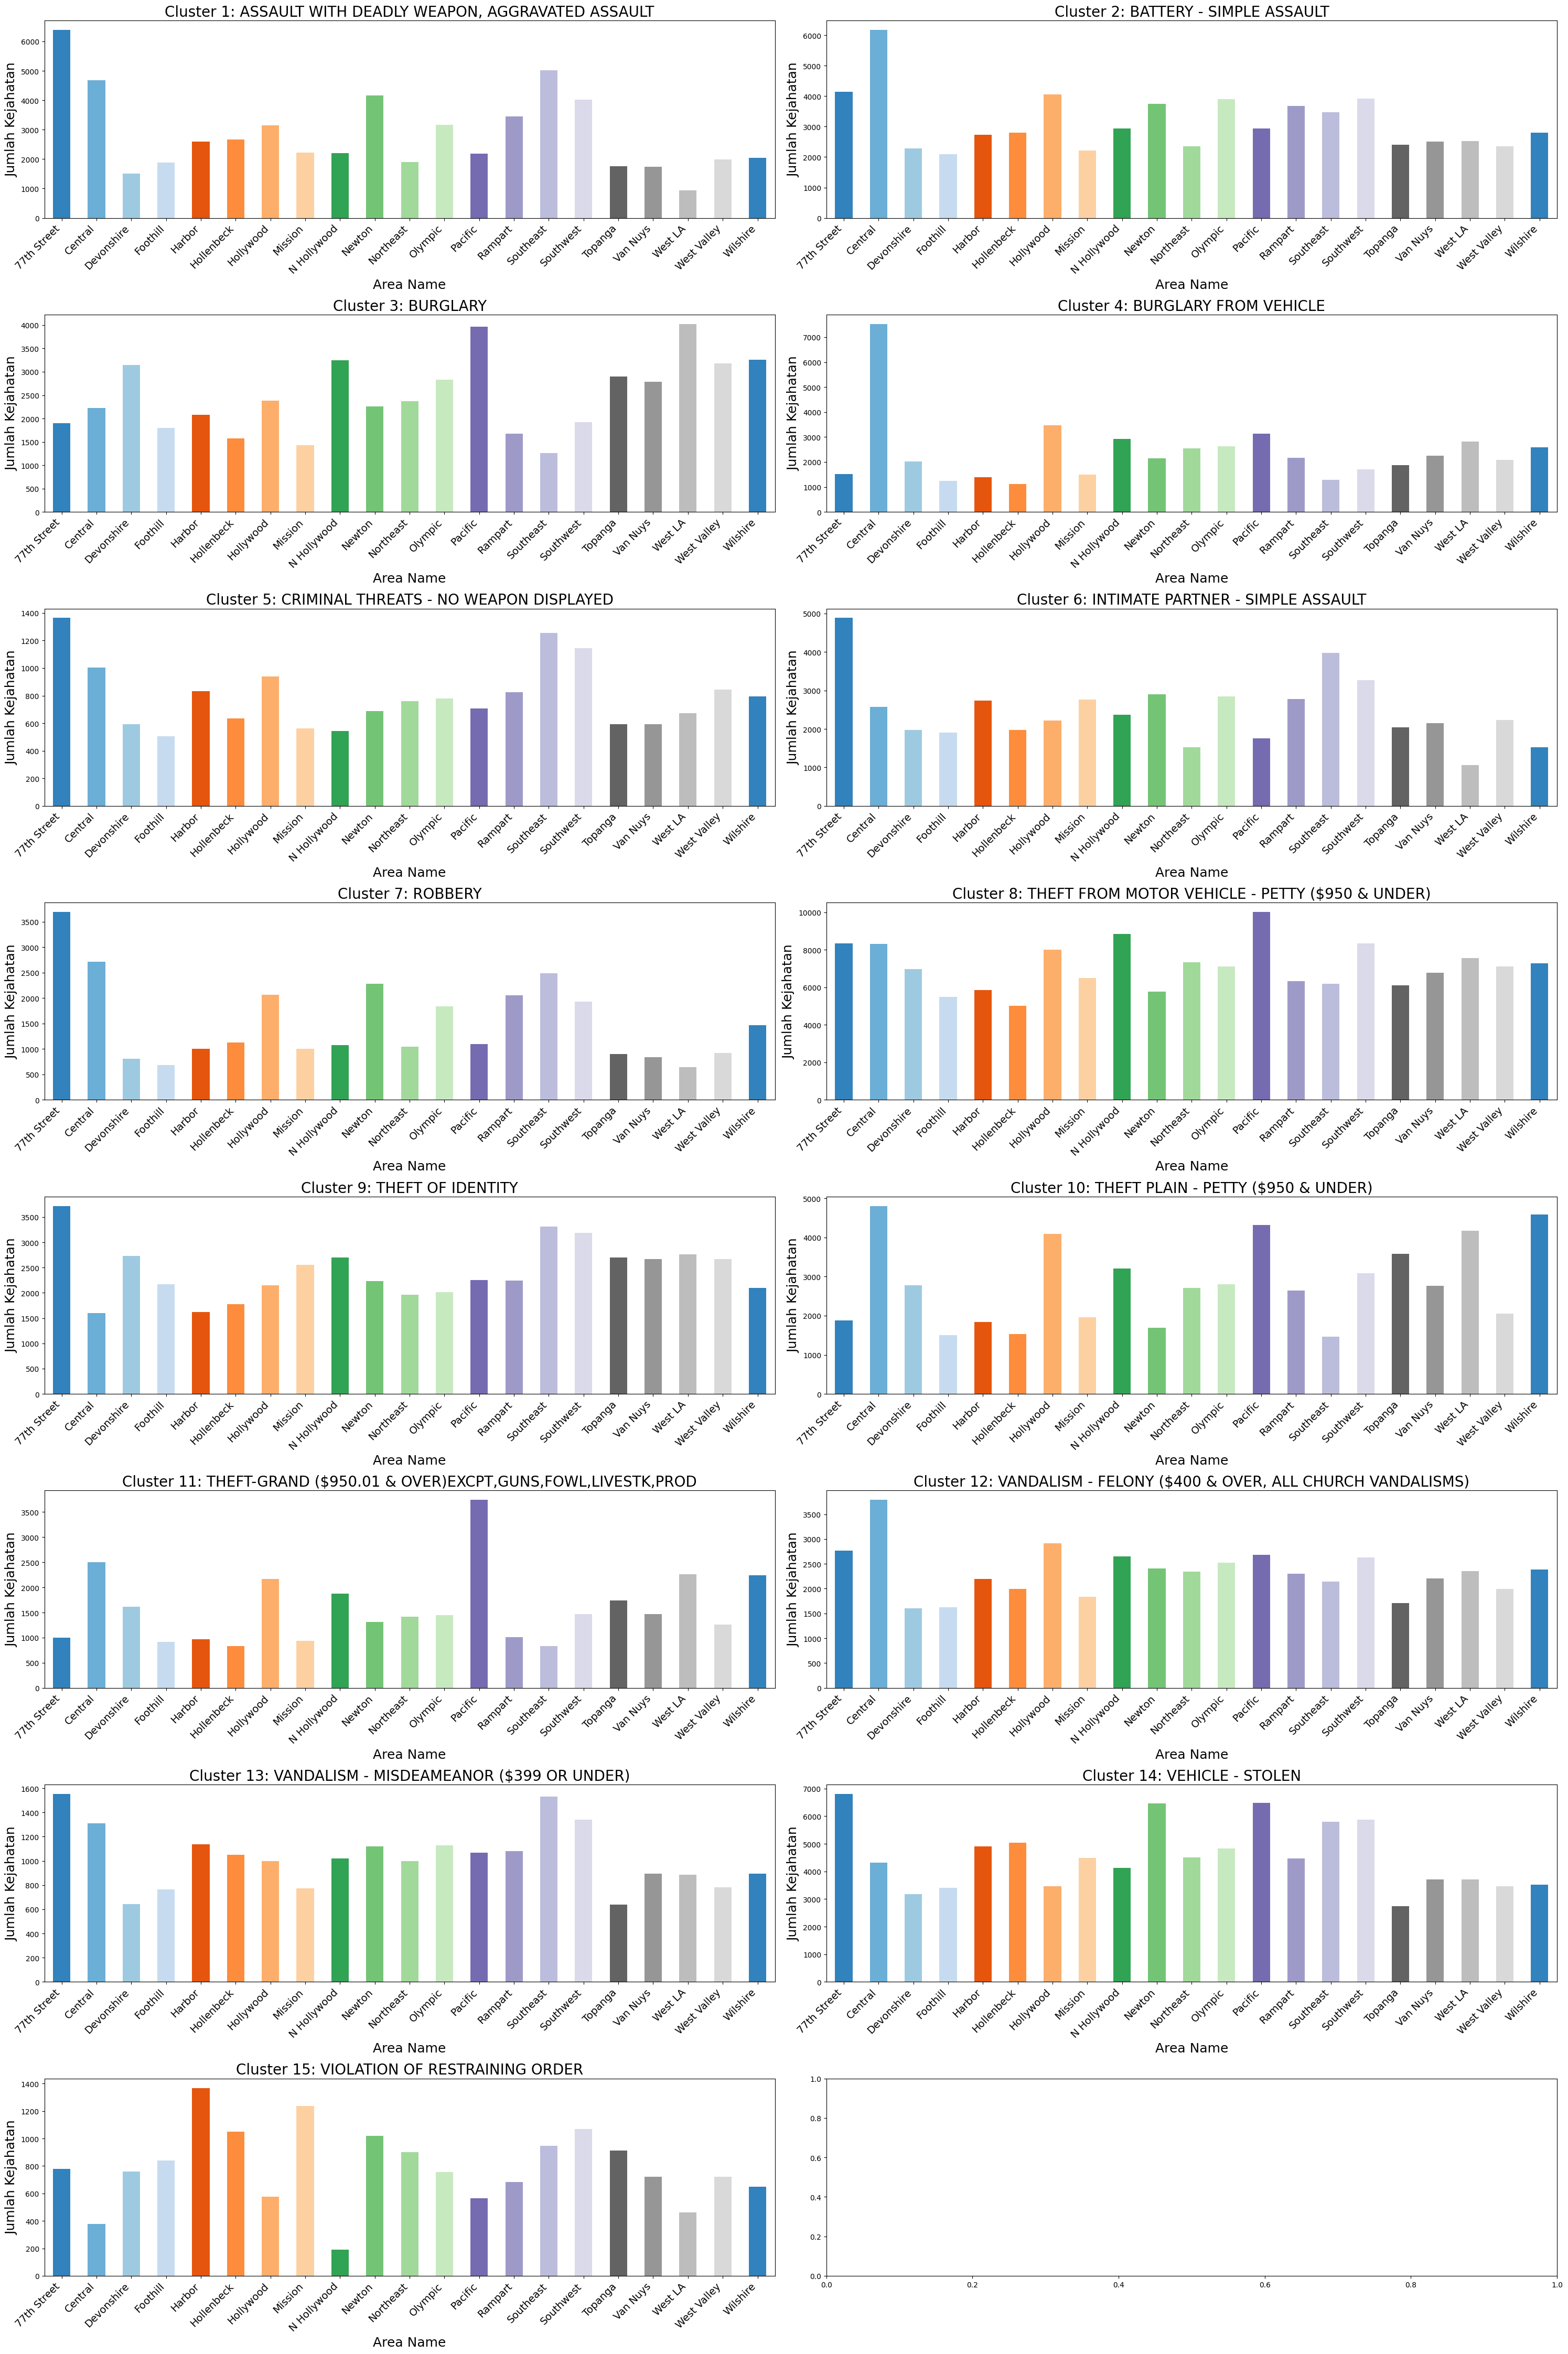

In [23]:
# Menambahkan kolom cluster ke DataFrame
df['Cluster'] = kmeans.labels_


# Membuat kamus untuk memetakan cluster ke jenis kejahatan
cluster_names = df.groupby('Cluster')['Crm Cd Desc'].agg(lambda x: x.value_counts().index[0]).to_dict()

# Mengganti label cluster dengan nama jenis kejahatan
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

# Membuat tabel kontingensi antara Cluster_Name dan Area Name
contingency_table = pd.crosstab(df['Cluster_Name'], df['AREA NAME'])

# Menyajikan dalam grid 8x2
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(30, 45))

# Iterasi melalui setiap subplot
colors = plt.cm.tab20c.colors
for i, (ax, cluster_name) in enumerate(zip(axes.flatten(), contingency_table.index)):
    contingency_table.loc[cluster_name].plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Cluster {i + 1}: {cluster_name}', fontsize=20)
    ax.set_xlabel('Area Name', fontsize=18)
    ax.set_ylabel('Jumlah Kejahatan', fontsize=18)

    # Menyesuaikan label area agar lebih jelas
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)

plt.tight_layout()
plt.show()